# 1. Import Packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve,
)
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import label_binarize
from sklearn import metrics
from sklearn.linear_model import LogisticRegression


# 2. Load Datset

In [2]:
# load datasets for two subjects, Math and Portuguese
mat = pd.read_csv("student-mat.csv", sep=';')
por = pd.read_csv("student-por.csv", sep=';')

# 3. Preparetion

In [3]:
# merge datasets
df = pd.concat([mat,por])

In [4]:
# rename column labels
df.columns = ['school','sex','age','address','family_size','parents_status','mother_education','father_education',
           'mother_job','father_job','reason','guardian','commute_time','study_time','failures','school_support',
          'family_support','paid_classes','activities','nursery','desire_higher_edu','internet','romantic','family_quality',
          'free_time','go_out','weekday_alcohol_usage','weekend_alcohol_usage','health','absences','period1_score','period2_score','final_score']

In [5]:
# convert final_score to categorical variable # Good:15~20 Fair:10~14 Poor:0~9
df['final_grade'] = 'na'
df.loc[df.final_score.between(15, 20), 'final_grade'] = 'good'
df.loc[df.final_score.between(10, 14), 'final_grade'] = 'fair'
df.loc[df.final_score.between(0, 9), 'final_grade'] = 'poor'
df.head(5)

,school,sex,age,address,family_size,parents_status,mother_education,father_education,mother_job,father_job,...,free_time,go_out,weekday_alcohol_usage,weekend_alcohol_usage,health,absences,period1_score,period2_score,final_score,final_grade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,poor
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,poor
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,fair
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,good
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,fair


In [6]:
df.dtypes

school                   object
sex                      object
age                       int64
address                  object
family_size              object
parents_status           object
mother_education          int64
father_education          int64
mother_job               object
father_job               object
reason                   object
guardian                 object
commute_time              int64
study_time                int64
failures                  int64
school_support           object
family_support           object
paid_classes             object
activities               object
nursery                  object
desire_higher_edu        object
internet                 object
romantic                 object
family_quality            int64
free_time                 int64
go_out                    int64
weekday_alcohol_usage     int64
weekend_alcohol_usage     int64
health                    int64
absences                  int64
period1_score             int64
period2_

## Look for missing values

In [7]:
# look for missing values
df.isnull().any()

school                   False
sex                      False
age                      False
address                  False
family_size              False
parents_status           False
mother_education         False
father_education         False
mother_job               False
father_job               False
reason                   False
guardian                 False
commute_time             False
study_time               False
failures                 False
school_support           False
family_support           False
paid_classes             False
activities               False
nursery                  False
desire_higher_edu        False
internet                 False
romantic                 False
family_quality           False
free_time                False
go_out                   False
weekday_alcohol_usage    False
weekend_alcohol_usage    False
health                   False
absences                 False
period1_score            False
period2_score            False
final_sc

In [8]:
# look for missing values
df.isnull().any()

school                   False
sex                      False
age                      False
address                  False
family_size              False
parents_status           False
mother_education         False
father_education         False
mother_job               False
father_job               False
reason                   False
guardian                 False
commute_time             False
study_time               False
failures                 False
school_support           False
family_support           False
paid_classes             False
activities               False
nursery                  False
desire_higher_edu        False
internet                 False
romantic                 False
family_quality           False
free_time                False
go_out                   False
weekday_alcohol_usage    False
weekend_alcohol_usage    False
health                   False
absences                 False
period1_score            False
period2_score            False
final_sc

## There is no missing values!

# 4. EDA

## 4.1 Final Grade Distribution

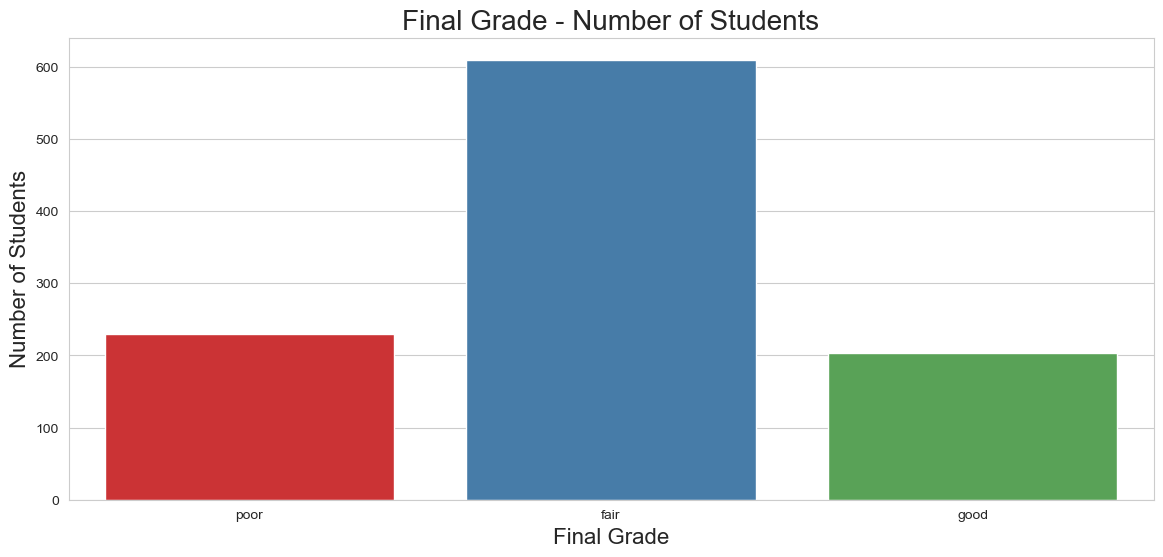

In [9]:


# Final Grade Countplot
plt.figure(figsize=(14, 6))
sns.countplot(x=df['final_grade'], order=["poor", "fair", "good"], palette='Set1')
plt.title('Final Grade - Number of Students', fontsize=20)
plt.xlabel('Final Grade', fontsize=16)
plt.ylabel('Number of Students', fontsize=16)

# Save the figure
plt.savefig('final_grade_countplot.png')

## 4.2 Correlation Heatmap

C:\Users\User\AppData\Local\Temp\ipykernel_20400\1844806859.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


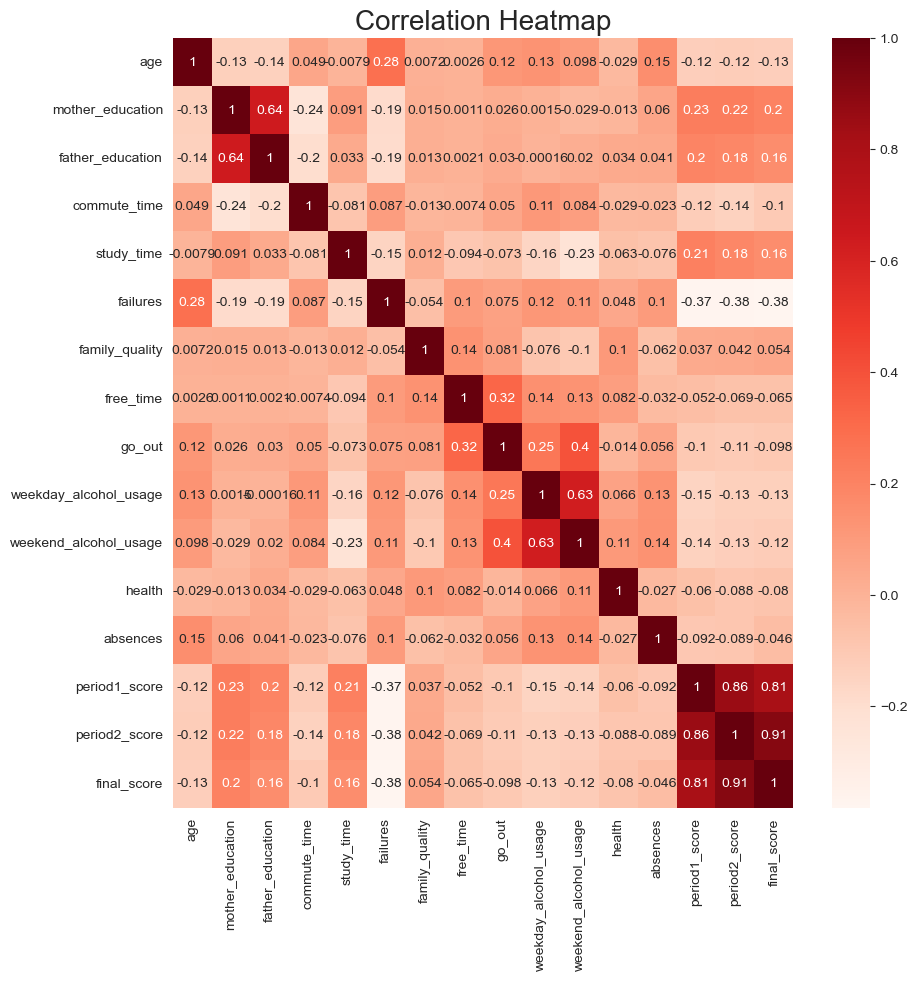

In [10]:
# see correlation between variables through a correlation heatmap
corr = df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, cmap="Reds")
plt.title('Correlation Heatmap', fontsize=20)

# Save the figure
plt.savefig('correlation_heatmap.png')

# Display the plot
plt.show()

## 4.3 Final Grade By Parents Education Level

## Finiding Out how parent's educationl level influence student performance

In [11]:
# create good and bad student dataframe
good = df[df.final_grade == 'good'].copy()
poor = df[df.final_grade == 'poor'].copy()

In [12]:
good['good_student_father_education'] = good['father_education']
poor['poor_student_father_education'] = poor['father_education']
good['good_student_mother_education'] = good['mother_education']
poor['poor_student_mother_education'] = poor['mother_education']

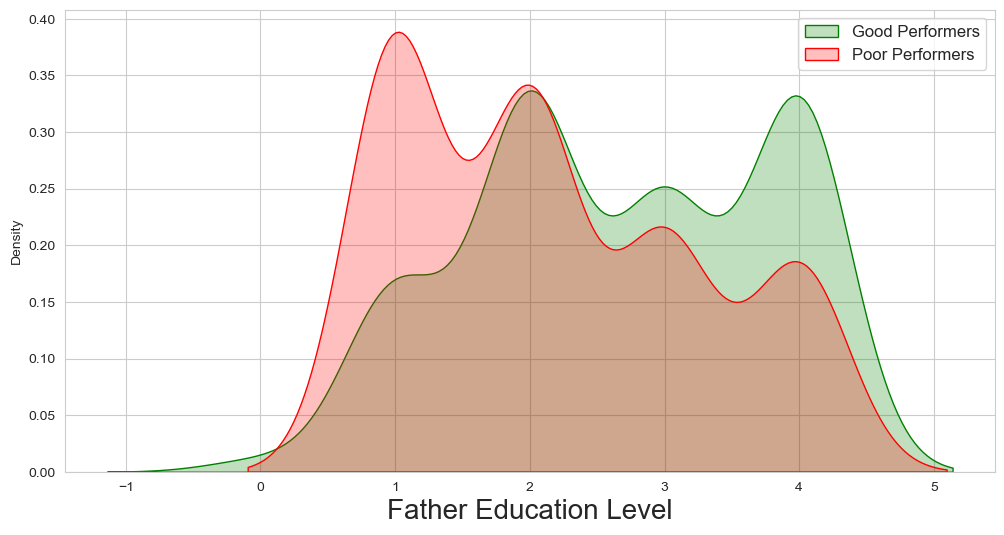

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.kdeplot(good['good_student_father_education'], fill=True, color="green", label="Good Performers")
sns.kdeplot(poor['poor_student_father_education'], fill=True, color="red", label="Poor Performers")
plt.xlabel('Father Education Level', fontsize=20)

# Show the legend
plt.legend(fontsize=12)

# Save the figure (optional)
plt.savefig('father_education_kde.png')

# Display the plot
plt.show()


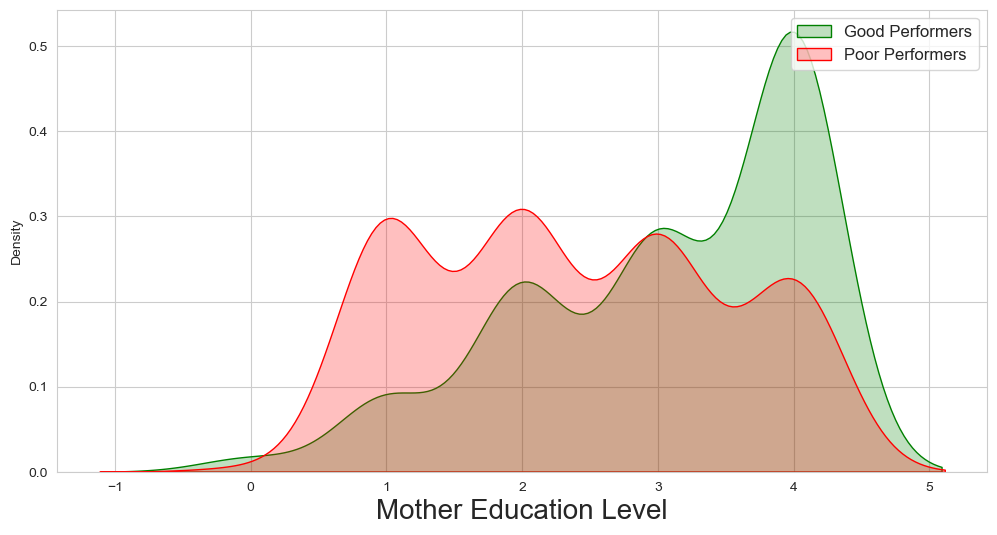

In [14]:


plt.figure(figsize=(12, 6))
sns.kdeplot(good['good_student_mother_education'], fill=True, color="green", label="Good Performers")
sns.kdeplot(poor['poor_student_mother_education'], fill=True, color="red", label="Poor Performers")
plt.xlabel('Mother Education Level', fontsize=20)

# Show the legend
plt.legend(fontsize=12)

# Save the figure (optional)
plt.savefig('mother_education_kde.png')

# Display the plot
plt.show()


Text(0.5, 1.0, 'Correlation Heatmap')

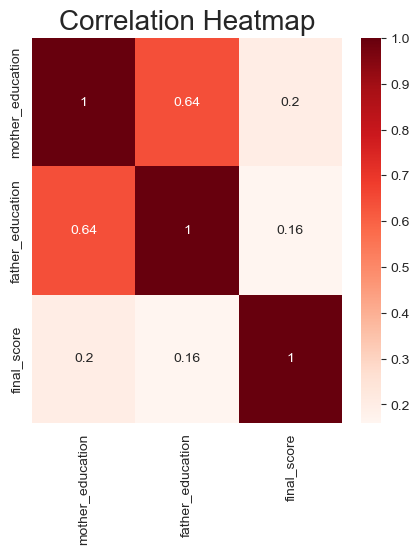

In [15]:
plt.figure(figsize=(5, 5))
sns.heatmap(df[['mother_education', 'father_education', 'final_score']].corr(), 
            annot=True, cmap="Reds").set_title('Correlation Heatmap', 
            fontsize=20)


## From correlation heatmap parents' education level has a positive correlation with students' final score. Comparatively, mother's education level has bigger influence than father's education level!

## If you are woman and want your your kid to perform good in highschool, get higher education; If you are a man, marry someone with higher education

## Finding out should parent's let their kids frequently hang out with their friends?

## 4.4 Final Grade By Frequency Of Going Out

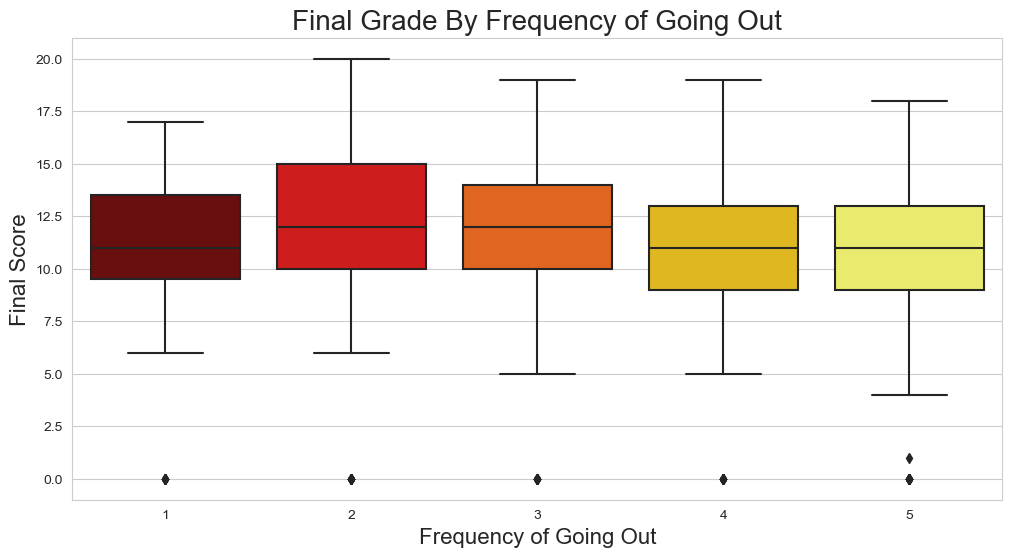

In [16]:
# going out with friends (numeric: from 1 - very low to 5 - very high)
plt.figure(figsize=(12,6))
sns.boxplot(x='go_out', y='final_score', data=df, palette='hot')
plt.title('Final Grade By Frequency of Going Out', fontsize=20)
plt.ylabel('Final Score', fontsize=16)
plt.xlabel('Frequency of Going Out', fontsize=16)

# Save the figure (optional)
plt.savefig('final_grade_going_out.png')

# Display the plot
plt.show()

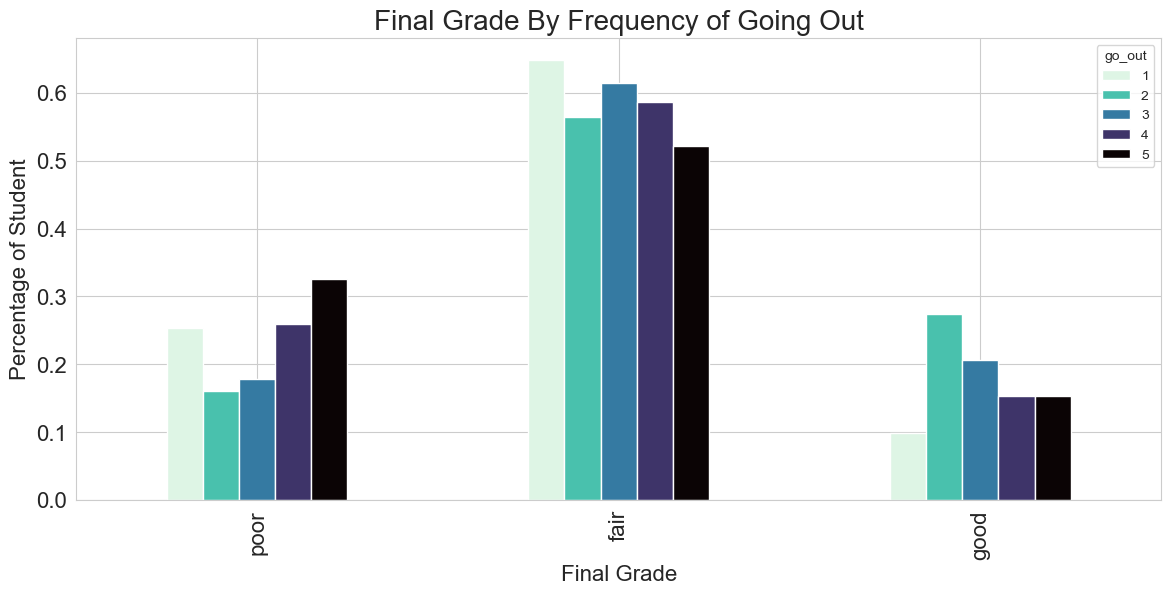

In [17]:
perc = (lambda col: col/col.sum())
index = ['poor','fair','good']
out_tab = pd.crosstab(index=df.final_grade, columns=df.go_out)
out_perc = out_tab.apply(perc).reindex(index)

out_perc.plot.bar(colormap="mako_r", fontsize=16, figsize=(14,6))
plt.title('Final Grade By Frequency of Going Out', fontsize=20)
plt.ylabel('Percentage of Student', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)

# Save the figure
plt.savefig('final_grade_going_out_percentage.png')

# Display the plot
plt.show()

## Parents should limit the frequency of their children going out

## Should parents push their children towards receiving higher education?

## 4.5 Final Grade By Desire To Go To College

In [18]:
higher_tab = pd.crosstab(index=df.final_grade, columns=df.desire_higher_edu)
higher_perc = higher_tab.apply(perc).reindex(index)

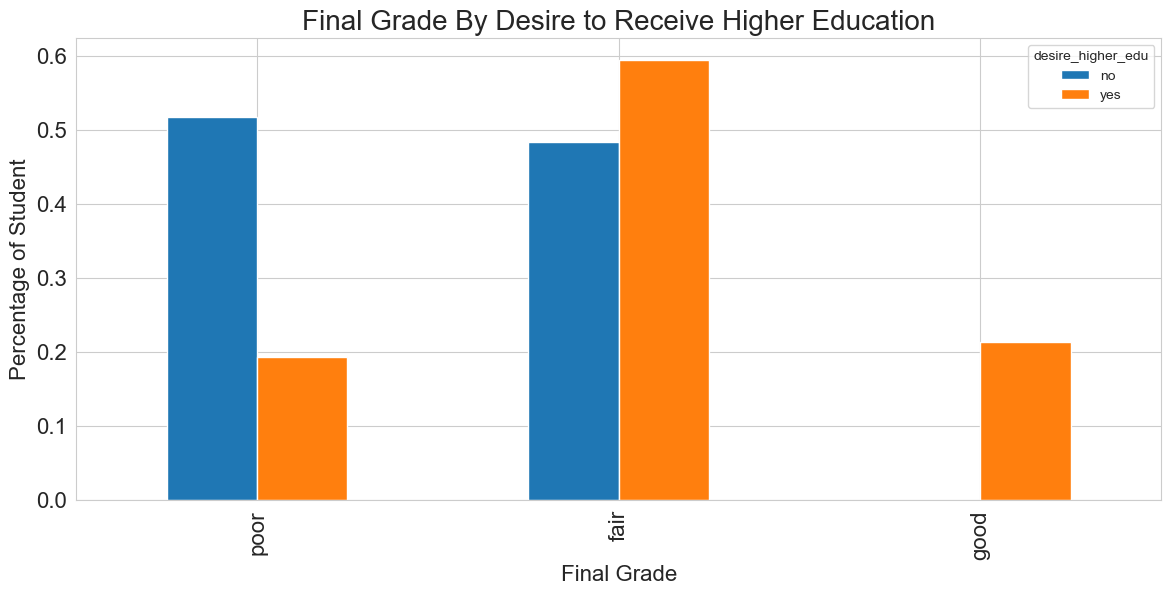

In [19]:
higher_perc.plot.bar(figsize=(14,6), fontsize=16)
plt.title('Final Grade By Desire to Receive Higher Education', fontsize=20)
plt.xlabel('Final Grade', fontsize=16)
plt.ylabel('Percentage of Student', fontsize=16)

# Save the figure
plt.savefig('final_grade_higher_education.png')

# Display the plot
plt.show()

## Parents should motivate their children to receive higher education

## Should parents move to urban side?

## 4.6 Final Grade By Living Area

In [20]:
# living area: urban vs. rural
df.address = df.address.map({'U':'Urban', 'R':'Rural'})

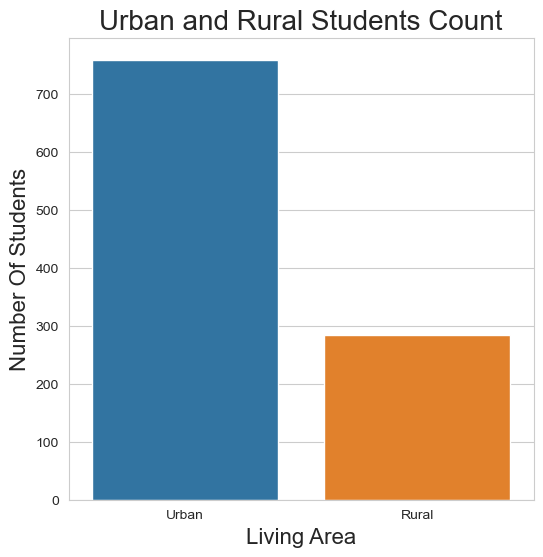

In [21]:
plt.figure(figsize=(6,6))
sns.countplot(x = df['address'])
plt.title('Urban and Rural Students Count', fontsize=20)
plt.xlabel('Living Area', fontsize=16)
plt.ylabel('Number Of Students', fontsize=16)
plt.show()

In [22]:
ad_tab1 = pd.crosstab(index=df.final_grade, columns=df.address)
ad_tab = np.log(ad_tab1)
ad_perc = ad_tab.apply(perc).reindex(index)

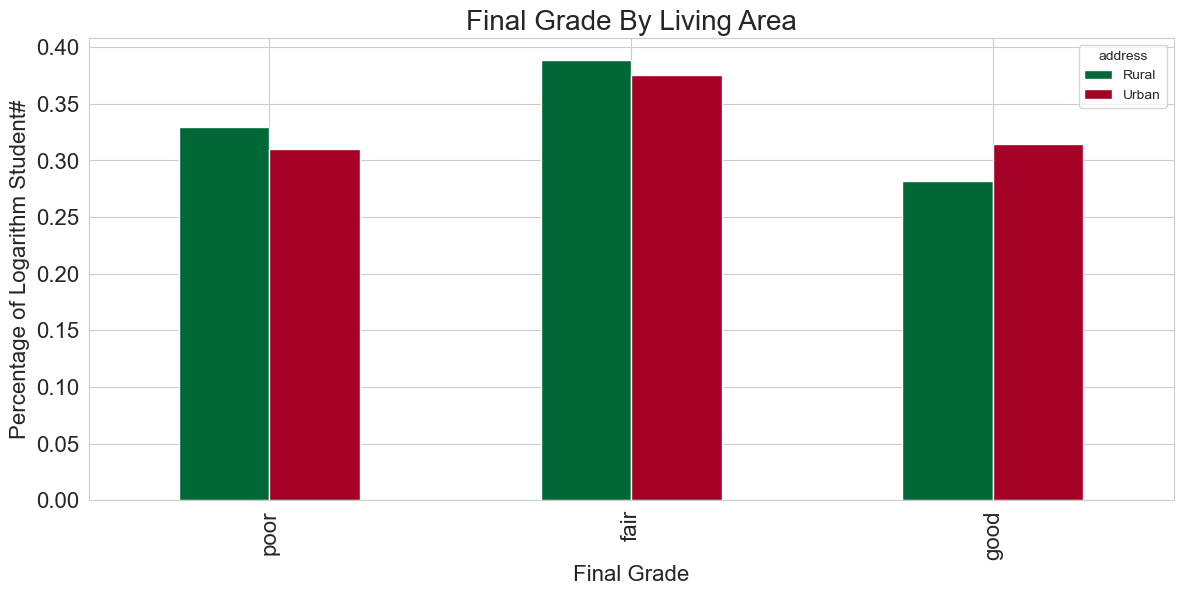

In [23]:
ad_perc.plot.bar(colormap="RdYlGn_r", fontsize=16, figsize=(14,6))
plt.title('Final Grade By Living Area', fontsize=20)
plt.ylabel('Percentage of Logarithm Student#', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)

# Save the figure
plt.savefig('final_grade_living_area.png')

# Display the plot
plt.show()

## Move to city for better academic performance of your child

# 5. Classificaion

## 5.1 Dataset Preprocessing for Modelling

## One-Hot Encoding

In [24]:


# Assuming you have loaded your dataset into a DataFrame called 'df'

# Select the categorical features
categorical_features = ['school', 'sex', 'address', 'family_size', 'parents_status',
                        'school_support', 'family_support', 'paid_classes', 'activities',
                        'nursery', 'desire_higher_edu', 'internet', 'romantic',
                        'mother_job', 'father_job', 'reason', 'guardian']

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Apply one-hot encoding to the categorical features
encoded_categorical = encoder.fit_transform(df[categorical_features])

# Get the column names for the encoded categorical features
categorical_feature_names = encoder.get_feature_names_out(categorical_features)

# Create a DataFrame with the encoded categorical features and column names
df_encoded_categorical = pd.DataFrame(encoded_categorical, columns=categorical_feature_names)

# Reset the column names of the original DataFrame to avoid duplicate column names
df.reset_index(drop=True, inplace=True)

# Concatenate the encoded categorical features with the remaining features
df_encoded = pd.concat([df_encoded_categorical, df.drop(categorical_features, axis=1)], axis=1)


C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


## Min-Max Scaler

In [25]:


# Assuming you have loaded your dataset into a DataFrame called 'df'

# Select the numeric features to be scaled
numeric_features = ['age', 'absences', 'period1_score', 'period2_score', 'final_score']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply scaling to the numeric features
df_scaled = df_encoded.copy()
df_scaled[numeric_features] = scaler.fit_transform(df_scaled[numeric_features])


## Drop Final Score

In [26]:
# create dataframe dfd for classification
dfd = df_scaled.copy()
dfd = dfd.drop([ 'final_score'], axis=1)
dfd.head()

,school_GP,school_MS,sex_F,sex_M,address_Rural,address_Urban,family_size_GT3,family_size_LE3,parents_status_A,parents_status_T,...,family_quality,free_time,go_out,weekday_alcohol_usage,weekend_alcohol_usage,health,absences,period1_score,period2_score,final_grade
0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,4,3,4,1,1,3,0.080000,0.263158,0.315789,poor
1,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,5,3,3,1,1,3,0.053333,0.263158,0.263158,poor
2,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,4,3,2,2,3,3,0.133333,0.368421,0.421053,fair
3,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,3,2,2,1,1,5,0.026667,0.789474,0.736842,good
4,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,4,3,2,1,2,5,0.053333,0.315789,0.526316,fair


## Final Grade Mapping

In [27]:
# Final grade mapping


# Assuming you have loaded your dataset into a DataFrame called 'df'
# and the column 'final_grade' contains the values 'poor', 'fair', and 'good'

# Define the mapping dictionary
grade_mapping = {'poor': 0, 'fair': 1, 'good': 2}

# Map the column using the mapping dictionary
dfd['final_grade'] = dfd['final_grade'].map(grade_mapping)

# Print the updated DataFrame
dfd.head()

,school_GP,school_MS,sex_F,sex_M,address_Rural,address_Urban,family_size_GT3,family_size_LE3,parents_status_A,parents_status_T,...,family_quality,free_time,go_out,weekday_alcohol_usage,weekend_alcohol_usage,health,absences,period1_score,period2_score,final_grade
0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,4,3,4,1,1,3,0.080000,0.263158,0.315789,0
1,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,5,3,3,1,1,3,0.053333,0.263158,0.263158,0
2,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,4,3,2,2,3,3,0.133333,0.368421,0.421053,1
3,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,3,2,2,1,1,5,0.026667,0.789474,0.736842,2
4,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,4,3,2,1,2,5,0.053333,0.315789,0.526316,1


## Dataset Splitting

In [28]:
# dataset train_test_split

X = dfd.drop('final_grade',axis=1)
y = dfd.final_grade
# Split the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [29]:
feature_names = X_train.columns

In [30]:
# see total number of features
len(list(X_train))

58

# Classification

## 1. Decision Tree Classification

In [31]:
# find the optimal # of minimum samples leaf

omsl=[]
for i in range(1,58):
    tree = DecisionTreeClassifier(min_samples_leaf=i)
    t= tree.fit(X_train, y_train)
    ts=t.score(X_test, y_test)
    omsl.append(ts)
omsl = pd.Series(omsl)

omsl_accuracy = omsl.max()
omsl_value = omsl.idxmax() + 1

print("Optimal minimum samples leaf accuracy:", omsl_accuracy)
print("Optimal minimum samples leaf value:", omsl_value)

Optimal minimum samples leaf accuracy: 0.8662420382165605
Optimal minimum samples leaf value: 8


In [32]:
# final model
tree = DecisionTreeClassifier(min_samples_leaf=omsl_value)
t= tree.fit(X_train, y_train)
print("Decisioin Tree Model Score" , ":" , t.score(X_train, y_train))  
print("Cross Validation Score" ,":" , t.score(X_test, y_test))

Decisioin Tree Model Score : 0.9164383561643835
Cross Validation Score : 0.8662420382165605


In [33]:
# Predict the test set labels
y_pred = t.predict(X_test)

In [34]:
# Calculate the accuracy of the final model
accuracy = accuracy_score(y_test, y_pred)
print("Final model accuracy:", accuracy)

Final model accuracy: 0.8662420382165605


In [35]:

# Generate and print the classification report
report = classification_report(y_test, y_pred)
print("Decision Tree Classification Report:\n", report)

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.72      0.80        79
           1       0.82      0.96      0.89       171
           2       0.98      0.80      0.88        64

    accuracy                           0.87       314
   macro avg       0.90      0.83      0.86       314
weighted avg       0.88      0.87      0.86       314



In [36]:
# Calculate and print the precision, recall, and F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Precision: 0.8763377208949018
Recall: 0.8662420382165605
F1-score: 0.8639732053166316


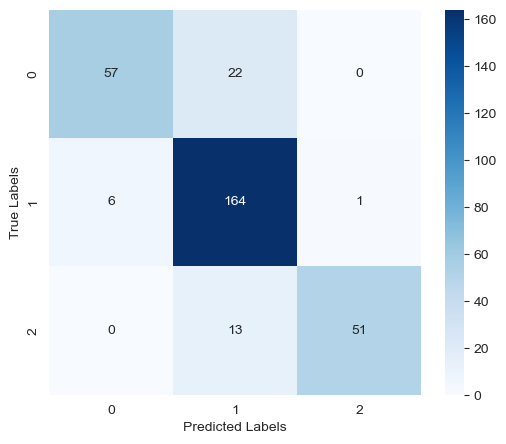

In [37]:
# Calculate and plot the confusion matrix for the test set
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
# plt.title("Confusion Matrix (Test Set)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.savefig('decision_tree_confusion_matrix.png')
plt.show()

Decision Tree Micro-average ROC AUC: 0.9485628220211773
Decision Tree Macro-average ROC AUC: 0.9372550499901485


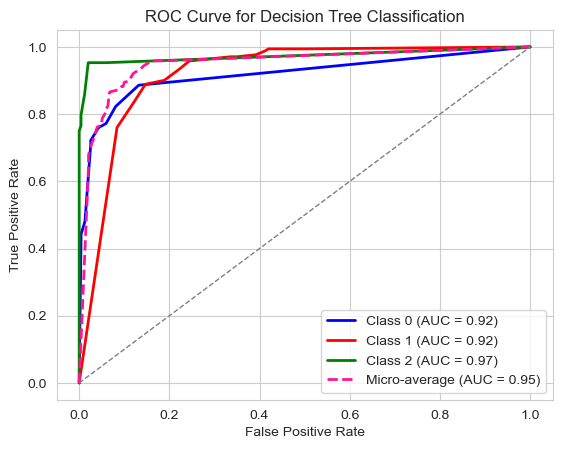

In [38]:
# Binarize the true labels
y_test_binarized = label_binarize(y_test, classes=t.classes_)

# Compute the probability predictions for each class
y_pred_proba = t.predict_proba(X_test)

# Compute the ROC curve and ROC AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(t.classes_)):
    fpr[i], tpr[i], _ = metrics.roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])

# Compute the micro-average ROC curve and ROC AUC
fpr_micro, tpr_micro, _ = metrics.roc_curve(y_test_binarized.ravel(), y_pred_proba.ravel())
roc_auc_micro = metrics.auc(fpr_micro, tpr_micro)

# Compute the macro-average ROC AUC
roc_auc_macro = sum(roc_auc.values()) / len(roc_auc)

# Print the ROC AUC scores
print("Decision Tree Micro-average ROC AUC:", roc_auc_micro)
print("Decision Tree Macro-average ROC AUC:", roc_auc_macro)

# Plot the ROC curve for each class
plt.figure()
colors = ['blue', 'red', 'green']  # Add more colors for additional classes if needed
for i, color in zip(range(len(t.classes_)), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='Class {0} (AUC = {1:0.2f})'.format(i, roc_auc[i]))

# Plot the micro-average ROC curve
plt.plot(fpr_micro, tpr_micro, color='deeppink', lw=2, linestyle='--',
         label='Micro-average (AUC = {0:0.2f})'.format(roc_auc_micro))

# Plot the chance line
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')

# Set plot properties
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree Classification')
plt.legend(loc='lower right')
plt.grid(True)
plt.savefig('ROC Curve for Decision Tree Classication.png')
# Show the plot
plt.show()


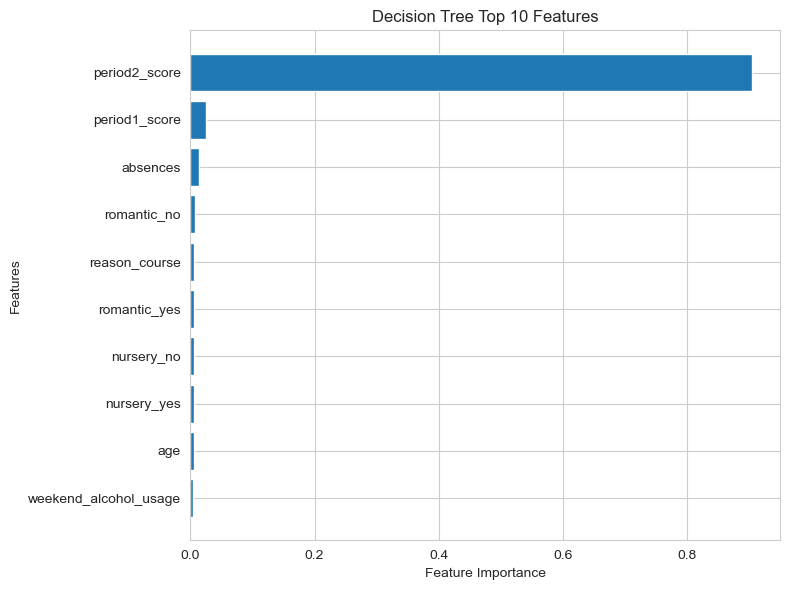

In [39]:
# Get feature importances
importances = tree.feature_importances_

# Get indices of top 10 features
top10_indices = importances.argsort()[-10:]

# Get names of top 10 features
top10_features = X_train.columns[top10_indices]

# Get importance values of top 10 features
top10_importances = importances[top10_indices]

# Plot the feature importances
plt.figure(figsize=(8, 6))
plt.barh(range(len(top10_features)), top10_importances, align='center')
plt.yticks(range(len(top10_features)), top10_features)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Decision Tree Top 10 Features')
plt.tight_layout()

# Save the figure
plt.savefig('Decision_Tree_top10_features.png')

## 2.Random Forest Classification

In [40]:
# find a good # of estimators

gne = []
for i in range(1, 58):
    forest = RandomForestClassifier(n_estimators=i)
    forest.fit(X_train, y_train)
    accuracy = forest.score(X_test, y_test)
    gne.append(accuracy)

gne = pd.Series(gne)
gne_accuracy = gne.max()
gne_value = gne.idxmax()

print("Optimal number of estimators:", gne_value)
print("Maximum accuracy:", gne_accuracy)

Optimal number of estimators: 31
Maximum accuracy: 0.8630573248407644


In [41]:
# find a good # of min_samples_leaf


gmsl = []
for i in range(1, 58):
    forest = RandomForestClassifier(n_estimators=gne_value, min_samples_leaf=i)
    forest.fit(X_train, y_train)
    accuracy = forest.score(X_test, y_test)
    gmsl.append(accuracy)

gmsl = pd.Series(gmsl)
gmsl_accuracy = gmsl.max()
gmsl_value = gmsl.idxmax() + 1

print("Optimal minimum samples leaf:", gmsl_value)
print("Accuracy:", gmsl_accuracy)

Optimal minimum samples leaf: 2
Accuracy: 0.8439490445859873


In [42]:
# Final Random Forest model
forest = RandomForestClassifier(n_estimators=gne_value, min_samples_leaf=gmsl_value)
f= forest.fit(X_train, y_train)
print("Raondom Forest Model Score" , ":" , f.score(X_train, y_train))
print("Cross Validation Score" ,":" , f.score(X_test, y_test))

Raondom Forest Model Score : 0.9753424657534246
Cross Validation Score : 0.8343949044585988


In [43]:
# Predict the test set labels
y_pred = f.predict(X_test)

In [44]:
# Calculate the accuracy of the final model
accuracy = accuracy_score(y_test, y_pred)
print("Final model accuracy:", accuracy)

Final model accuracy: 0.8343949044585988


In [45]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Generate and print the classification report
report = classification_report(y_test, y_pred)
print("Random Forest Classification Report:\n", report)

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.59      0.72        79
           1       0.78      0.97      0.86       171
           2       1.00      0.77      0.87        64

    accuracy                           0.83       314
   macro avg       0.89      0.78      0.82       314
weighted avg       0.86      0.83      0.83       314



In [46]:
# Calculate and print the precision, recall, and F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Precision: 0.8556415662027037
Recall: 0.8343949044585988
F1-score: 0.828137572227785


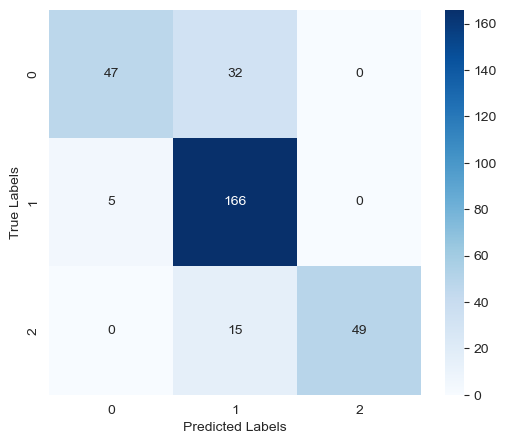

In [47]:
# Calculate and plot the confusion matrix for the test set
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
# plt.title("Confusion Matrix (Test Set)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.savefig('random_forest_confusion_matrix.png')
plt.show()


Random Forest Micro-average ROC AUC: 0.9523028317578808
Random Forest Macro-average ROC AUC: 0.9505480924559517


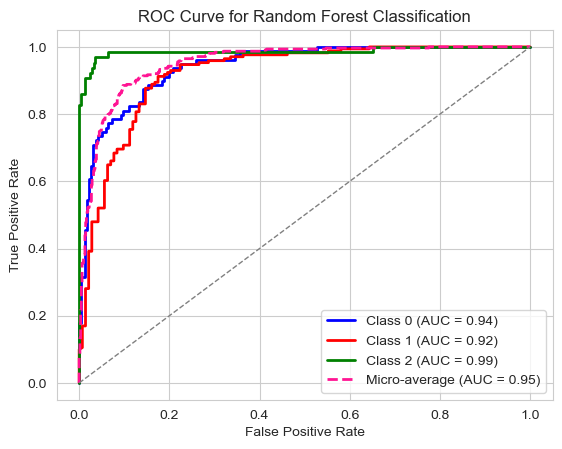

In [48]:

# Binarize the true labels
y_test_binarized = label_binarize(y_test, classes=f.classes_)

# Compute the probability predictions for each class
y_pred_proba = f.predict_proba(X_test)

# Compute the ROC curve and ROC AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(f.classes_)):
    fpr[i], tpr[i], _ = metrics.roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])

# Compute the micro-average ROC curve and ROC AUC
fpr_micro, tpr_micro, _ = metrics.roc_curve(y_test_binarized.ravel(), y_pred_proba.ravel())
roc_auc_micro = metrics.auc(fpr_micro, tpr_micro)

# Compute the macro-average ROC AUC
roc_auc_macro = sum(roc_auc.values()) / len(roc_auc)

# Print the ROC AUC scores
print("Random Forest Micro-average ROC AUC:", roc_auc_micro)
print("Random Forest Macro-average ROC AUC:", roc_auc_macro)

# Plot the ROC curve for each class
plt.figure()
colors = ['blue', 'red', 'green']  # Add more colors for additional classes if needed
for i, color in zip(range(len(f.classes_)), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='Class {0} (AUC = {1:0.2f})'.format(i, roc_auc[i]))

# Plot the micro-average ROC curve
plt.plot(fpr_micro, tpr_micro, color='deeppink', lw=2, linestyle='--',
         label='Micro-average (AUC = {0:0.2f})'.format(roc_auc_micro))

# Plot the chance line
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')

# Set plot properties
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest Classification')
plt.legend(loc='lower right')
plt.grid(True)
plt.savefig('ROC Curve for Random Forest Classification.png')
# Show the plot
plt.show()



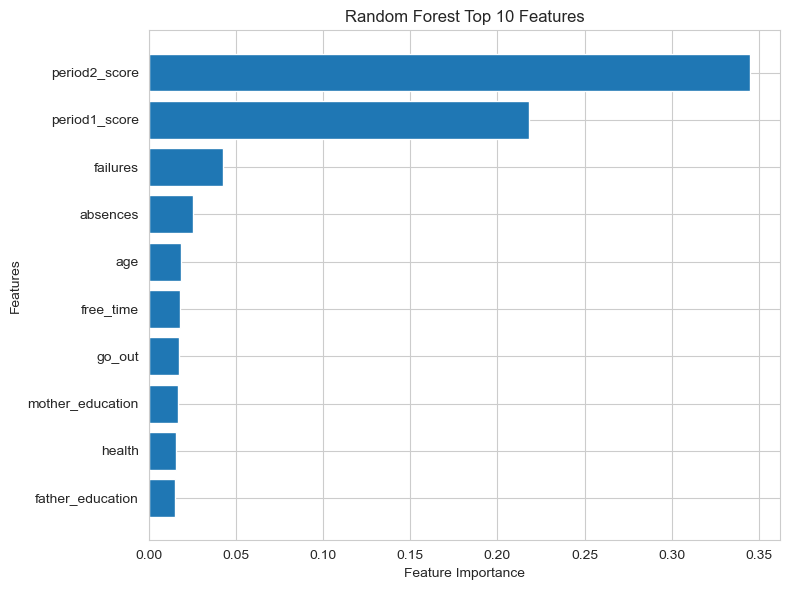

In [49]:
# Get feature importances
importances = f.feature_importances_

# Get indices of top 10 features
top10_indices = importances.argsort()[-10:]

# Get names of top 10 features
top10_features = X_train.columns[top10_indices]

# Get importance values of top 10 features
top10_importances = importances[top10_indices]

# Plot the feature importances
plt.figure(figsize=(8, 6))
plt.barh(range(len(top10_features)), top10_importances, align='center')
plt.yticks(range(len(top10_features)), top10_features)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Random Forest Top 10 Features')
plt.tight_layout()

# Save the figure
plt.savefig('Random_forest_top10_features.png')

## 3.K-Nearest Neigbour

In [50]:
from sklearn.neighbors import KNeighborsClassifier

best_k = 0
best_accuracy = 0
accuracy_values = []

for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    accuracy_values.append(accuracy)
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k

    print(f"Accuracy for k={k}: {accuracy}")

print("\nOptimal number of neighbors (KNN):", best_k)
print("Accuracy with optimal number of neighbors:", best_accuracy)

Accuracy for k=1: 0.535031847133758
Accuracy for k=2: 0.4968152866242038
Accuracy for k=3: 0.5796178343949044
Accuracy for k=4: 0.6050955414012739
Accuracy for k=5: 0.5764331210191083
Accuracy for k=6: 0.5828025477707006
Accuracy for k=7: 0.5700636942675159
Accuracy for k=8: 0.5605095541401274
Accuracy for k=9: 0.5732484076433121
Accuracy for k=10: 0.5764331210191083
Accuracy for k=11: 0.5700636942675159
Accuracy for k=12: 0.5732484076433121
Accuracy for k=13: 0.5700636942675159
Accuracy for k=14: 0.5764331210191083
Accuracy for k=15: 0.5796178343949044
Accuracy for k=16: 0.5796178343949044
Accuracy for k=17: 0.5764331210191083
Accuracy for k=18: 0.5796178343949044
Accuracy for k=19: 0.5796178343949044
Accuracy for k=20: 0.5732484076433121

Optimal number of neighbors (KNN): 4
Accuracy with optimal number of neighbors: 0.6050955414012739


In [51]:
# Final KNN Model

knn = knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
print("KNN Model Score" , ":" , knn.score(X_train, y_train))
print("KNN Validation Score" ,":" , knn.score(X_test, y_test))

KNN Model Score : 0.7232876712328767
KNN Validation Score : 0.6050955414012739


In [52]:
# Predict the test set labels
y_pred = knn.predict(X_test)

In [53]:
# Calculate the accuracy of the final model
accuracy = accuracy_score(y_test, y_pred)
print("Final model accuracy:", accuracy)

Final model accuracy: 0.6050955414012739


In [54]:
# Generate and print the classification report
report = classification_report(y_test, y_pred)
print("KNN Classification Report:\n", report)

KNN Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.32      0.41        79
           1       0.60      0.85      0.70       171
           2       0.69      0.31      0.43        64

    accuracy                           0.61       314
   macro avg       0.62      0.49      0.51       314
weighted avg       0.61      0.61      0.57       314



In [55]:
# Calculate and print the precision, recall, and F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Precision: 0.6111723315230327
Recall: 0.6050955414012739
F1-score: 0.5732636322565108


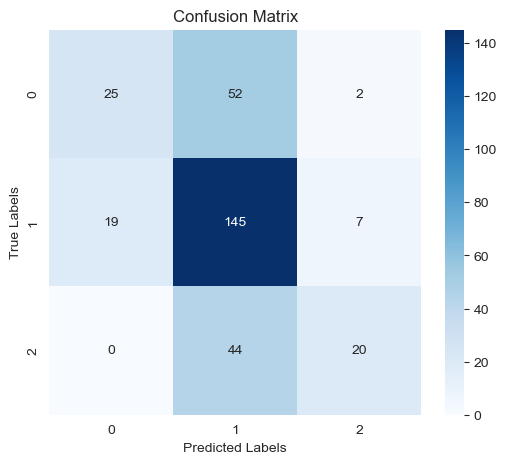

In [56]:
# Calculate and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.savefig('KNN_confusion_matrix.png')
plt.show()


KNN Micro-average ROC AUC: 0.7596175301229259
KNN Macro-average ROC AUC: 0.6829051241742766


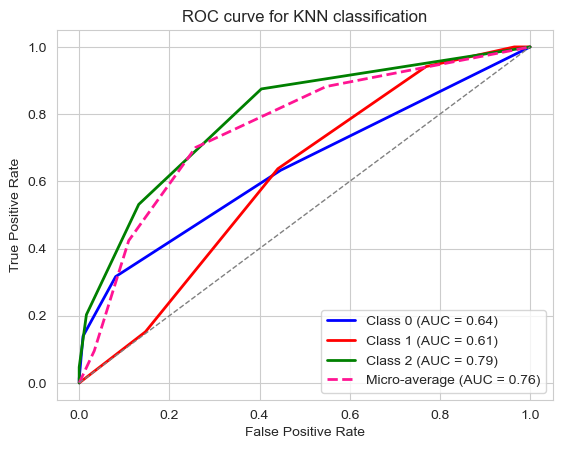

In [57]:
# Binarize the true labels
y_test_binarized = label_binarize(y_test, classes=knn.classes_)

# Compute the probability predictions for each class
y_pred_proba = knn.predict_proba(X_test)

# Compute the ROC curve and ROC AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(knn.classes_)):
    fpr[i], tpr[i], _ = metrics.roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])

# Compute the micro-average ROC curve and ROC AUC
fpr_micro, tpr_micro, _ = metrics.roc_curve(y_test_binarized.ravel(), y_pred_proba.ravel())
roc_auc_micro = metrics.auc(fpr_micro, tpr_micro)

# Compute the macro-average ROC AUC
roc_auc_macro = sum(roc_auc.values()) / len(roc_auc)

# Print the ROC AUC scores
print("KNN Micro-average ROC AUC:", roc_auc_micro)
print("KNN Macro-average ROC AUC:", roc_auc_macro)

# Plot the ROC curve for each class
plt.figure()
colors = ['blue', 'red', 'green']  # Add more colors for additional classes if needed
for i, color in zip(range(len(knn.classes_)), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='Class {0} (AUC = {1:0.2f})'.format(i, roc_auc[i]))

# Plot the micro-average ROC curve
plt.plot(fpr_micro, tpr_micro, color='deeppink', lw=2, linestyle='--',
         label='Micro-average (AUC = {0:0.2f})'.format(roc_auc_micro))

# Plot the chance line
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')

# Set plot properties
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for KNN classification')
plt.legend(loc='lower right')
plt.grid(True)
plt.savefig('ROC curve for KNN classification.png')
# Show the plot
plt.show()


## 4. ZeroR Classification

In [58]:
from sklearn.dummy import DummyClassifier

# Create a ZeroR classifier
zeroR = DummyClassifier(strategy='most_frequent')

# Fit the classifier to the training data
zeroR.fit(X_train, y_train)

print("ZeroR Model Score" , ":" , t.score(X_train, y_train))  
print("ZeroR Cross Validation Score" ,":" , t.score(X_test, y_test))

# Predict the test set labels
y_pred = t.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = zeroR.score(X_test, y_test)

print("Final ZeroR Accuracy:", accuracy)

ZeroR Model Score : 0.9164383561643835
ZeroR Cross Validation Score : 0.8662420382165605
Final ZeroR Accuracy: 0.5445859872611465


In [59]:
# Generate and print the classification report
report = classification_report(y_test, y_pred)
print("ZeroR Classification Report:\n", report)

ZeroR Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.72      0.80        79
           1       0.82      0.96      0.89       171
           2       0.98      0.80      0.88        64

    accuracy                           0.87       314
   macro avg       0.90      0.83      0.86       314
weighted avg       0.88      0.87      0.86       314



In [60]:
# Calculate and print the precision, recall, and F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Precision: 0.8763377208949018
Recall: 0.8662420382165605
F1-score: 0.8639732053166316


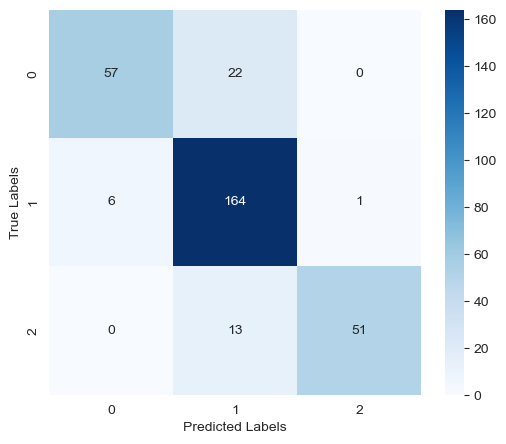

In [61]:
# Calculate and plot the confusion matrix for the test set
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
# plt.title("Confusion Matrix (Test Set)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.savefig('ZeroR_confusion_matrix.png')
plt.show()

## 5. Logistic Regression

In [62]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(multi_class='multinomial', solver='newton-cg',fit_intercept=True)

In [63]:
from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression classifier
logreg = LogisticRegression()

# Fit the classifier to the training data
logreg.fit(X_train, y_train)

# Make predictions on the test data
y_pred = logreg.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = logreg.score(X_test, y_test)

print("Logistic Regression Accuracy:", accuracy)


Logistic Regression Accuracy: 0.7929936305732485


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [64]:
# Generate and print the classification report
report = classification_report(y_test, y_pred)
print("Logistic Regression Classification Report:\n", report)

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.56      0.68        79
           1       0.74      0.95      0.83       171
           2       0.93      0.67      0.78        64

    accuracy                           0.79       314
   macro avg       0.85      0.73      0.77       314
weighted avg       0.82      0.79      0.78       314



In [65]:
# Calculate and print the precision, recall, and F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Precision: 0.8166225523946962
Recall: 0.7929936305732485
F1-score: 0.7845686997550626


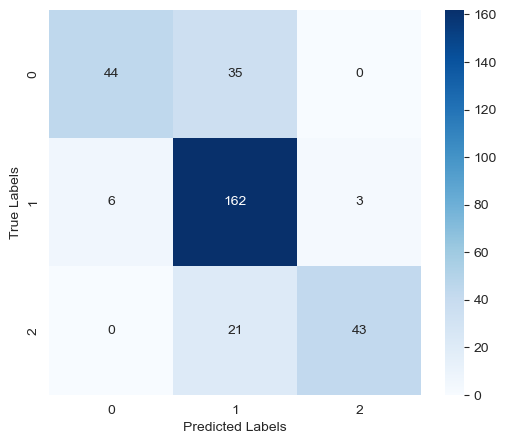

In [66]:
# Calculate and plot the confusion matrix for the test set
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
# plt.title("Confusion Matrix (Test Set)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.savefig('Logistic_Regression_confusion_matrix.png')
plt.show()

Logistic Regression Micro-average ROC AUC: 0.9221215870826402
Logistic Regression Macro-average ROC AUC: 0.9194762144096896


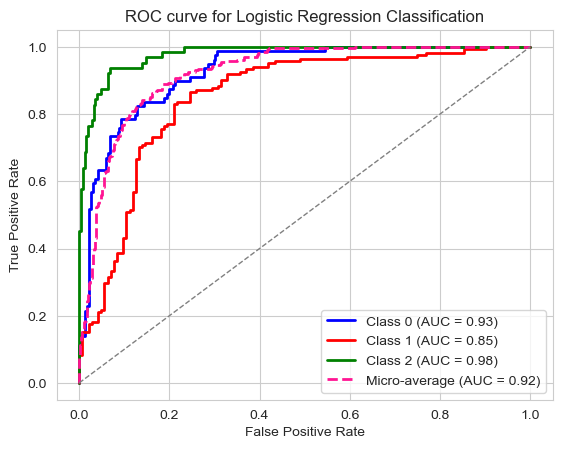

In [67]:
# Binarize the true labels
y_test_binarized = label_binarize(y_test, classes=logreg.classes_)

# Compute the probability predictions for each class
y_pred_proba = logreg.predict_proba(X_test)

# Compute the ROC curve and ROC AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(logreg.classes_)):
    fpr[i], tpr[i], _ = metrics.roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])

# Compute the micro-average ROC curve and ROC AUC
fpr_micro, tpr_micro, _ = metrics.roc_curve(y_test_binarized.ravel(), y_pred_proba.ravel())
roc_auc_micro = metrics.auc(fpr_micro, tpr_micro)

# Compute the macro-average ROC AUC
roc_auc_macro = sum(roc_auc.values()) / len(roc_auc)

# Print the ROC AUC scores
print("Logistic Regression Micro-average ROC AUC:", roc_auc_micro)
print("Logistic Regression Macro-average ROC AUC:", roc_auc_macro)

# Plot the ROC curve for each class
plt.figure()
colors = ['blue', 'red', 'green']  # Add more colors for additional classes if needed
for i, color in zip(range(len(logreg.classes_)), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='Class {0} (AUC = {1:0.2f})'.format(i, roc_auc[i]))

# Plot the micro-average ROC curve
plt.plot(fpr_micro, tpr_micro, color='deeppink', lw=2, linestyle='--',
         label='Micro-average (AUC = {0:0.2f})'.format(roc_auc_micro))

# Plot the chance line
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')

# Set plot properties
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Logistic Regression Classification')
plt.legend(loc='lower right')
plt.grid(True)
plt.savefig('ROC curve for Logistic Regression Classification.png')
# Show the plot
plt.show()


## 6.Support Vector Classification(SVC)

In [68]:
from sklearn.svm import SVC

# Create an SVC classifier
svc = SVC()

# Fit the classifier to the training data
svc.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svc.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = svc.score(X_test, y_test)

print("Support Vector Classification Accuracy:", accuracy)


Support Vector Classification Accuracy: 0.5700636942675159


In [69]:
# Generate and print the classification report
report = classification_report(y_test, y_pred)
print("Support Vector Classification Report:\n", report)

Support Vector Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.20      0.31        79
           1       0.56      0.95      0.71       171
           2       0.00      0.00      0.00        64

    accuracy                           0.57       314
   macro avg       0.41      0.39      0.34       314
weighted avg       0.47      0.57      0.46       314



C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [70]:
# Calculate and print the precision, recall, and F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Precision: 0.47382312028699025
Recall: 0.5700636942675159
F1-score: 0.46327314462259445


C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


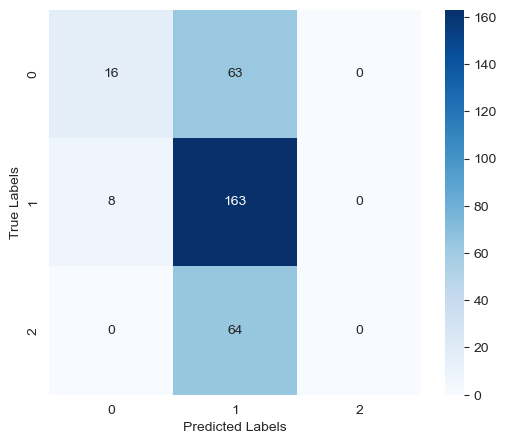

In [71]:
# Calculate and plot the confusion matrix for the test set
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
# plt.title("Confusion Matrix (Test Set)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.savefig('SVC_confusion_matrix.png')
plt.show()